#### Pavlo Yatluk
#### dz_47

### ЗАВДАННЯ

#### Протестуйте описані в лекції методи і моделі на датасеті AirPassenger, що міститься на GitHub в папці лекції та містить дані про коливання кількості пасажирів авіаліній із часом. Порівняйте метрики оцінки моделі для двох датасетів.

In [2]:
# імпорт бібліотек
import pandas as pd
import matplotlib
from matplotlib import pyplot
import warnings
import statsmodels
warnings.filterwarnings("ignore")

In [29]:
from statsmodels.tsa.stattools import acf, pacf

In [30]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [31]:
# імпорт датасету
series = pd.read_csv(r'C:\Users\Pavel\Documents\GitHub\PDS1\Lesson 47\AirPassengers.csv')
series

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


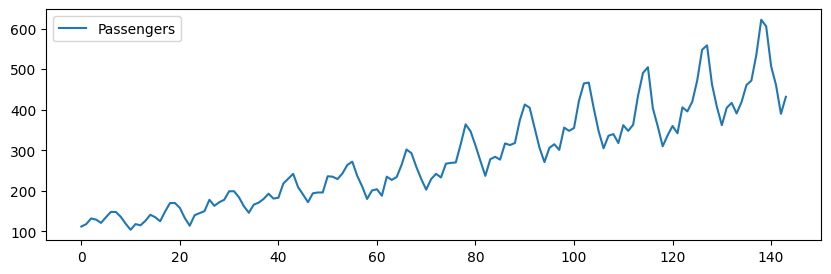

In [32]:
# візуалізація датасету
matplotlib.rcParams['figure.figsize'] = [10, 3]
series.plot()
pyplot.show()

In [33]:
# функції авториляції та часткової автокориляції
acf_value = acf(series.Passengers)
pacf_value = pacf(series.Passengers, nlags = 3)

In [34]:
# коефіцієнти кореляції Пірсона
acf_value

array([1.        , 0.94804734, 0.87557484, 0.80668116, 0.75262542,
       0.71376997, 0.6817336 , 0.66290439, 0.65561048, 0.67094833,
       0.70271992, 0.74324019, 0.76039504, 0.71266087, 0.64634228,
       0.58592342, 0.53795519, 0.49974753, 0.46873401, 0.44987066,
       0.4416288 , 0.45722376])

In [35]:
pacf_value

array([ 1.        ,  0.95467704, -0.26527732,  0.05546955])

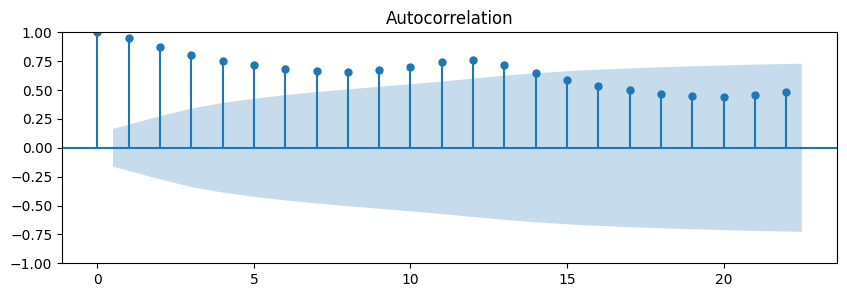

In [36]:
# візуалізація кореляцій
matplotlib.rcParams['figure.figsize'] = [10, 3]
plot_acf(series.Passengers)
pyplot.show()

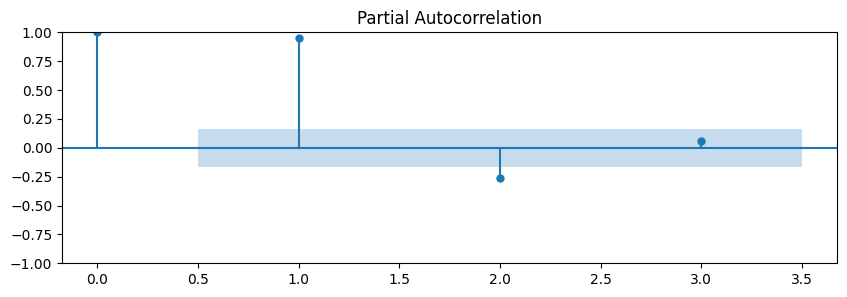

In [37]:
plot_pacf(series.Passengers, lags =3)
pyplot.show()

In [38]:
print(series.Passengers)

0      112
1      118
2      132
3      129
4      121
      ... 
139    606
140    508
141    461
142    390
143    432
Name: Passengers, Length: 144, dtype: int64


In [39]:
# прогноз за допомогою функції ARIMA
import statsmodels.api as sa

In [40]:
src_data_model = series.Passengers[:115]
model = sa.tsa.ARIMA(src_data_model).fit()

In [41]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Passengers   No. Observations:                  115
Model:                          ARIMA   Log Likelihood                -681.863
Date:                Sun, 12 Mar 2023   AIC                           1367.727
Time:                        08:50:56   BIC                           1373.216
Sample:                             0   HQIC                          1369.955
                                - 115                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        239.9478      9.613     24.960      0.000     221.106     258.789
sigma2      8271.3245   1363.556      6.066      0.000    5598.803    1.09e+04
===================================================================================
Ljung-Box (L1) (Q):                  98.78   Jarque-Bera (JB):                 7.59
Prob(Q):                              0.00   Prob(JB):                         0.02
Heteroskedasticity (H):               1.57   Skew:                             0.60
Prob(H) (two-sided):                  0.17   Kurtosis:                         2.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [47]:
# побудова прогнозу
pred = model.predict(115,143, typ='levels')

<AxesSubplot: >

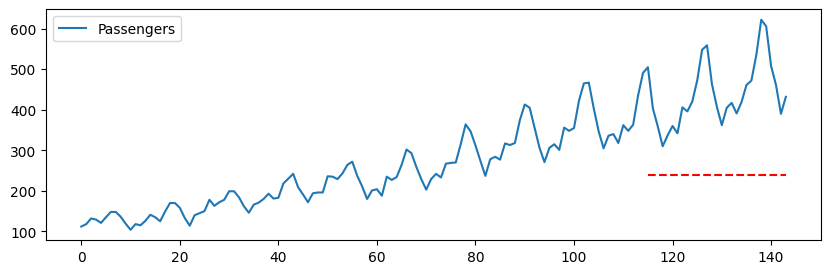

In [48]:
# візуалізація прогнозу
series.plot()
pred.plot(style='r--')

In [49]:
comp = series.Passengers[114:143]

In [53]:
pip install ml_metrics

Note: you may need to restart the kernel to use updated packages.


In [54]:
# оцінка моделі ARIMA
import ml_metrics as metrics

In [55]:
metrics.rmse(comp, pred)

217.1430839737836

In [56]:
metrics.mae(comp, pred)

202.39700632306153

In [57]:
# реалізація моделі SARIMAX
model = sa.tsa.statespace.SARIMAX(src_data_model, seasonal_order=(2,2,2,12)).fit()

In [61]:
pred = model.predict(115,143, typ='levels')

<AxesSubplot: >

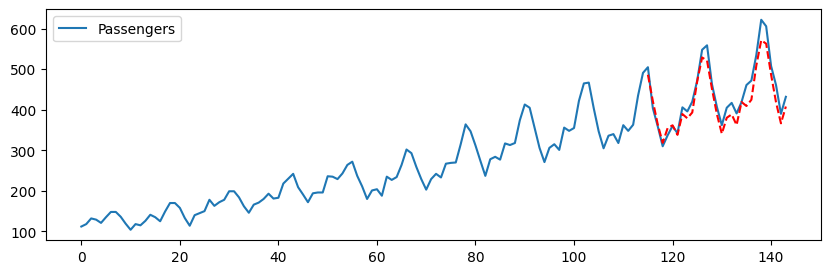

In [62]:
# візуалізація моделі SARIMAX
series.plot()
pred.plot(style='r--')

In [63]:
metrics.rmse(comp, pred)

54.9418799925595

In [64]:
metrics.mae(comp, pred)

46.03523298357461

### Порівняння метрик датасетів 'AirPassangers' та 'temperature'

In [13]:
import pandas as pd
compare_ = pd.read_excel('C:\projects sta\pythonProject\dz_47\Compare_ds.xlsx')
compare_

,Function,Unnamed: 1,Dataset,Unnamed: 3
0,NaN,NaN,AirPassangers,temperature
1,ARIMA,rmse,217.143,4.12045
2,NaN,mae,202.39,3.4003
3,SARIMAX,rmse,54.94,4.13758
4,NaN,mae,46.035,3.4089
